In [2]:
import numpy as np
import warnings
import random

warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_excel("onlinefoods.xlsx")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [6]:
data.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object

In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

<Axes: title={'center': 'Online Food Order Decisions Based on the Age of the Customer'}, xlabel='Age', ylabel='count'>

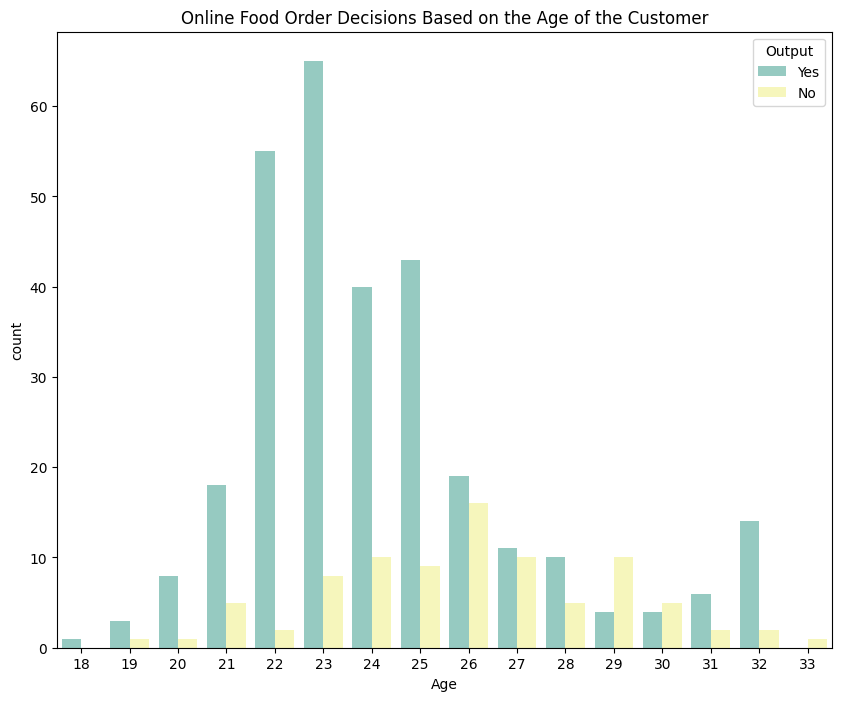

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.countplot(x="Age", data=data, hue="Output", palette="Set3")

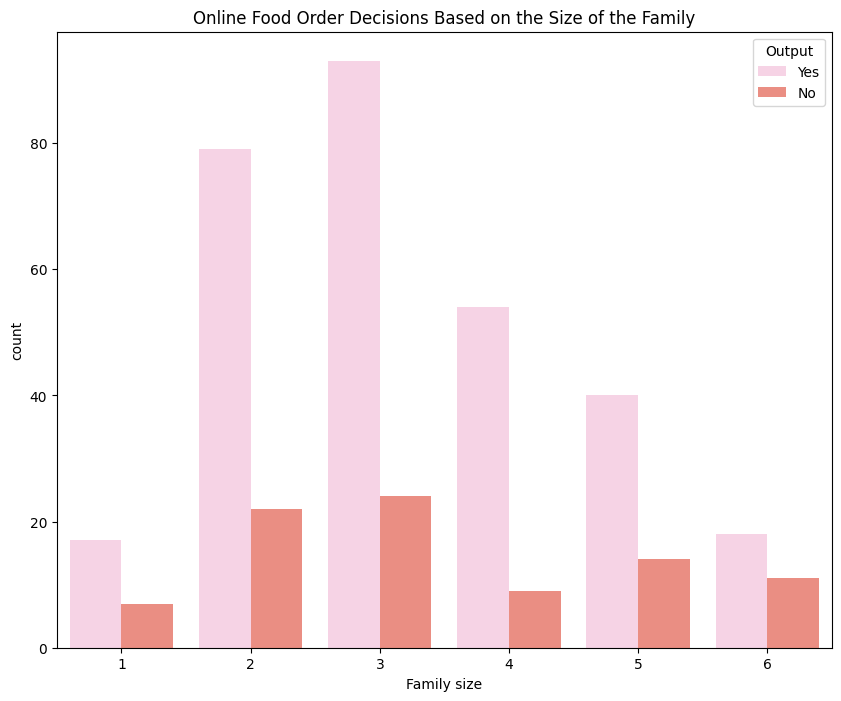

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.countplot(x="Family size", data=data, hue="Output", palette="Set3_r")

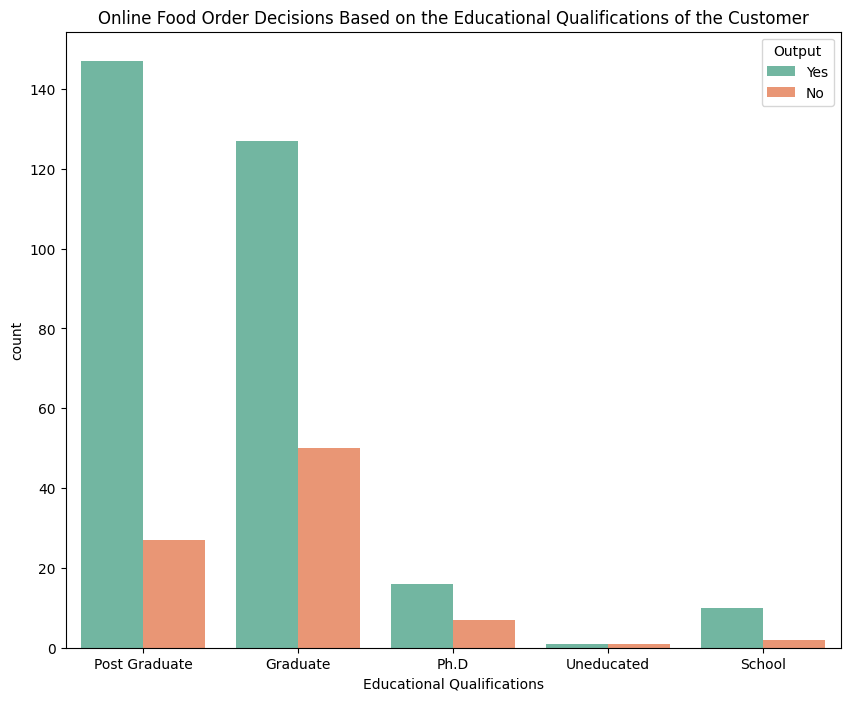

In [9]:
plt.figure(figsize=(10, 8))
plt.title(
    "Online Food Order Decisions Based on the Educational Qualifications of the Customer"
)
sns.countplot(x="Educational Qualifications", data=data, hue="Output", palette="Set2")

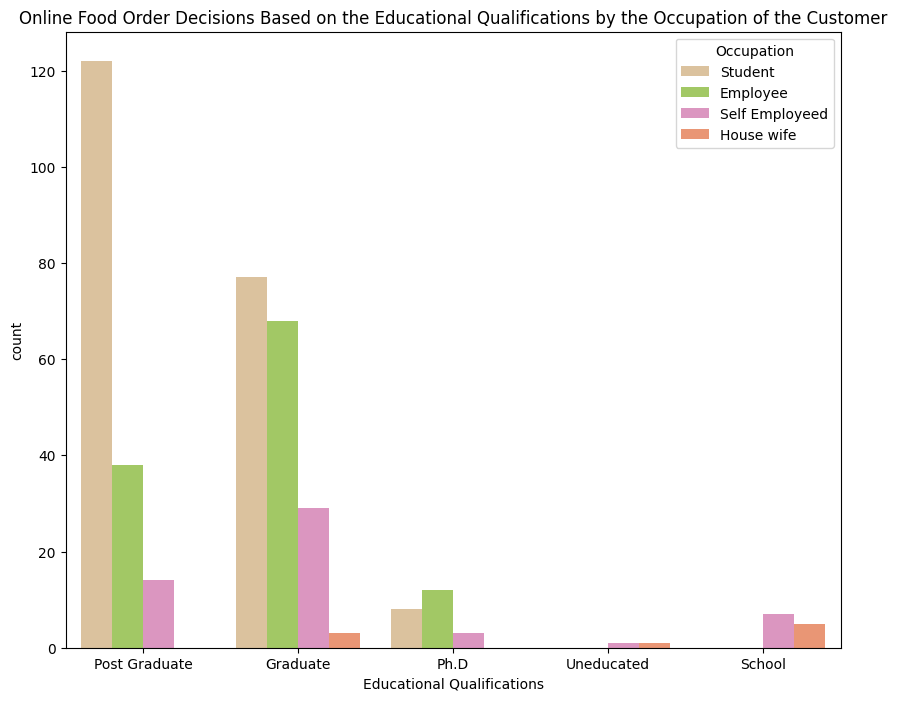

In [11]:
plt.figure(figsize=(10, 8))
plt.title(
    "Online Food Order Decisions Based on the Educational Qualifications by the Occupation of the Customer"
)
sns.countplot(
    x="Educational Qualifications", data=data, hue="Occupation", palette="Set2_r"
)

222 166


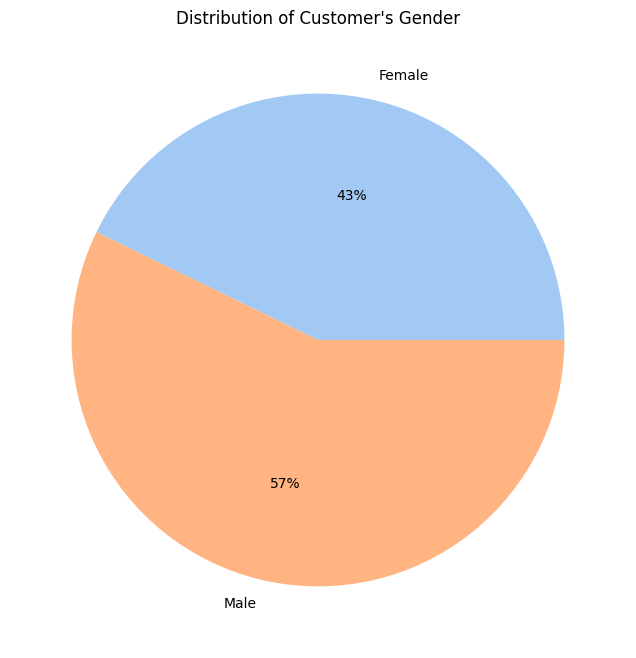

In [15]:
female = len(data[data["Gender"] == "Female"])
male = len(data[data["Gender"] == "Male"])
print(male, female)
data_gender = [female, male]
labels = ["Female", "Male"]

colors = sns.color_palette("pastel")[0:5]  # seaborn color palette to use

plt.figure(figsize=(10, 8))
plt.title("Distribution of Customer's Gender")
plt.pie(data_gender, labels=labels, colors=colors, autopct="%.0f%%")
plt.show()

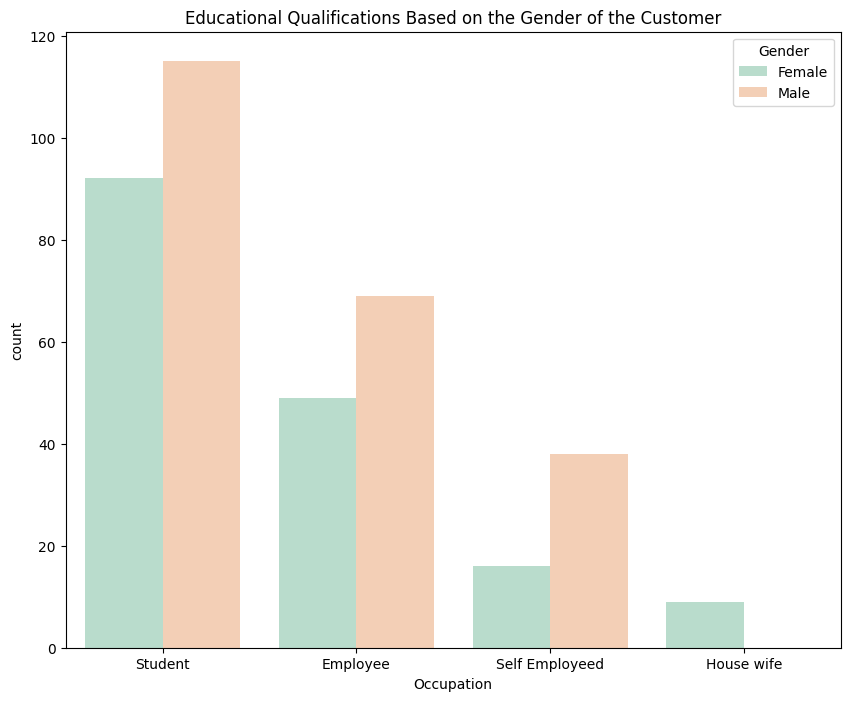

In [13]:
plt.figure(figsize=(10, 8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x="Occupation", data=data, hue="Gender", palette="Pastel2")

In [16]:
reorder = data[data["Output"] == "Yes"]
gender_data = reorder["Gender"].value_counts()
label = gender_data.index
counts = gender_data.values
print(label, counts)
colors = sns.color_palette("pastel")[2:4]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Which Gender is More Likely to Order Online Again?")
fig.update_traces(
    hoverinfo="label+percent", textinfo="value", marker=dict(colors=colors)
)

fig.show()

Index(['Male', 'Female'], dtype='object', name='Gender') [175 126]


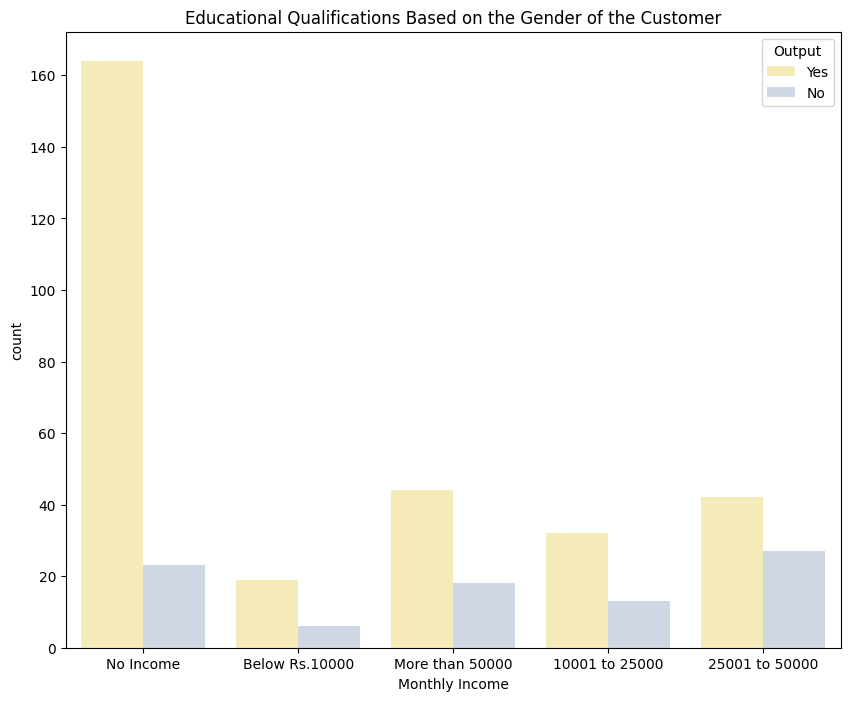

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x="Monthly Income", data=data, hue="Output", palette="Pastel2_r")

In [18]:
reorder = data[data["Output"] == "Yes"]
status_data = reorder["Marital Status"].value_counts()
label = status_data.index
counts = status_data.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="What is the Marital Status of Customers?")
fig.update_traces(
    hoverinfo="label+percent", textinfo="value", marker=dict(colors=colors)
)

fig.show()

In [19]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [20]:
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})  # male or female

data["Marital Status"] = data["Marital Status"].map(
    {"Married": 0, "Single": 1, "Prefer not to say": 2}
)


data["Occupation"] = data["Occupation"].replace(
    to_replace=["Employee", "Self Employeed"], value=1
)  # employed
data["Occupation"] = data["Occupation"].replace(
    to_replace=["Student", "House wife"], value=0
)  # unemployed


data["Educational Qualifications"] = data["Educational Qualifications"].map(
    {"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5}
)


data["Monthly Income"] = data["Monthly Income"].replace(
    to_replace=["No Income"], value=0
)  # no income
data["Monthly Income"] = data["Monthly Income"].replace(
    to_replace=[
        "Below Rs.10000",
        "More than 50000",
        "25001 to 50000",
        "10001 to 25000",
    ],
    value=1,
)  # has an income


data["Output"] = data["Output"].map({"No": 0, "Yes": 1})  # no or yes

In [24]:
data["Feedback"] = data["Feedback"].map(
    {"Negative ": 0, "Positive": 1}
)  # negative or positive

In [26]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,1,1,0,0,2,4,12.9766,77.5993,560001,1,1
1,24,1,1,0,1,1,3,12.9770,77.5773,560009,1,1
2,22,0,1,0,1,2,3,12.9551,77.6593,560017,1,0
3,22,1,1,0,0,1,6,12.9473,77.5616,560019,1,1
4,22,0,1,0,1,2,4,12.9850,77.5533,560010,1,1


In [27]:
X = data.drop("Output", axis=1)
y = data["Output"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 11)
Shape of test dataset :  (78, 11)


In [29]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

print(rfc.score(X_test, y_test))

0.8846153846153846


[[12  3]
 [ 6 57]]


<Axes: >

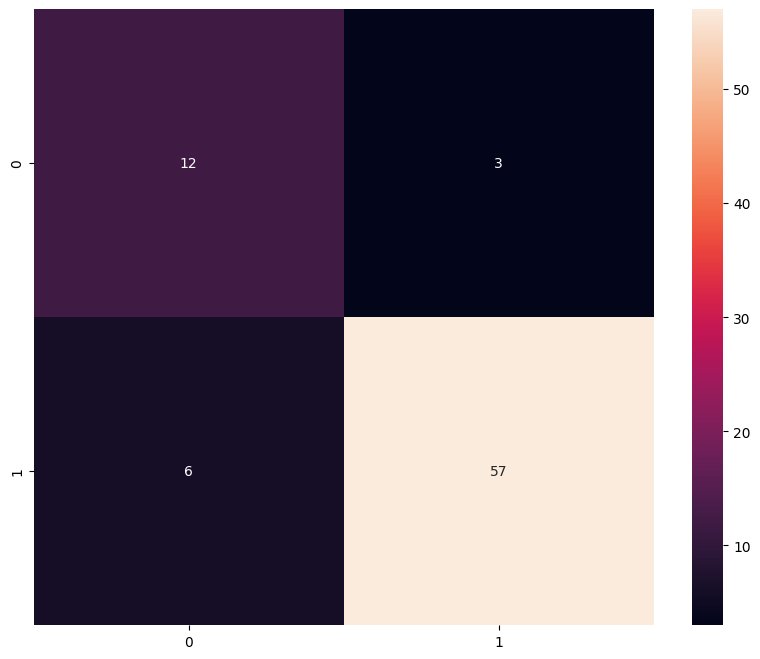

In [30]:
pred = rfc.predict(X_test)

print(confusion_matrix(pred, y_test))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(pred, y_test), annot=True)

In [31]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy
scores = cross_val_score(rfc, X_train, y_train, cv=5)

# average score
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.9064516129032258 0.03761904448287287


In [32]:
parameters = {"randomforestclassifier__n_estimators": (20, 50, 100)}

pipeline = make_pipeline(RandomForestClassifier())

pipeline

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [33]:
gridsearch = GridSearchCV(pipeline, parameters, verbose=1, n_jobs=-1)

In [34]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': (20, 50, 100)},
             verbose=1)

In [35]:
print("Best score %0.3f" % gridsearch.best_score_)
print("Best parameters set: ")
best_parameters = gridsearch.best_estimator_.get_params()

for params in sorted(parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Best score 0.906
Best parameters set: 
	randomforestclassifier__n_estimators: 100


In [36]:
r = random.randint(0, len(data))
print(r)
new_customer = data.drop("Output", axis=1).iloc[r]
new_customer

110


Age                               21.0000
Gender                             0.0000
Marital Status                     1.0000
Occupation                         0.0000
Monthly Income                     0.0000
Educational Qualifications         2.0000
Family size                        4.0000
latitude                          12.9770
longitude                         77.5773
Pin code                      560009.0000
Feedback                           1.0000
Name: 110, dtype: float64

In [ ]:
rfc.predict(new_customer.values.reshape(1, -1)).shape()  # predicted output

In [39]:
data.iloc[r]["Output"]  # actual Output

1.0

In [41]:
import joblib

# Save the model
joblib.dump(rfc, "model.pkl")

['model.pkl']